In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('Pokemon.csv', encoding='ISO-8859-1')

In [65]:
df = df.iloc[:-2]

In [66]:
# 查看大致数据
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,FALSE
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,FALSE
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,FALSE
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,FALSE
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,FALSE


Columns: \
'#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'

In [67]:
# Completeness
# 首先检查数据完整性
# 查看缺失值，发现 Legendary，HP 含有数据缺失
nan_rows = df[df.drop(columns='Type 2').isna().any(axis=1)]
nan_rows

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
17,13,Weedle,Bug,Poison,195,NaN,35,30,20,20,50,1,FALSE
39,32,Nidoranâ?Poison,NaN,273,46,57,40,40,40,50,1,FALSE,NaN
532,475,GalladeMega Gallade,Psychic,Fighting,618,68,165,95,65,115,110,4,NaN


In [68]:
# 删除含有缺失值的行
df = df.dropna(subset=df.columns.difference(['Type 2']))

Coherent： \
generation类型有的为False，应该为数字 \
Legendary中Poison Ground，应该为 True/False \
Name中有乱码 \
最后两行全为undefined

In [69]:
# Coherent
print(df['Legendary'].unique())
print(df['Generation'].unique())

['FALSE' '1' '0' 'Poison' 'Ground' 'TRUE']
['1' 'FALSE' '2' '3' '4' '5' '6' 'undefined']


In [73]:
# 查看是否有非数字的异常,没有发现不规范的值
num_columns = ['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed']
non_numeric_rows = df[num_columns].apply(pd.to_numeric, errors='coerce').isna().any(axis=1)
df[non_numeric_rows]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary


检查数据的一致性，即相同名字/编号的宝可梦是否属性相同 \
经检验，该数据集符合数据一致性 \
但存在重复数据

In [98]:
# Consistency
# 以Name为分组标准，查看是否存在同名而属性不同数据，没有发现
count_by_name = df.groupby('Name').nunique()
count_by_id = df.groupby('#').nunique()
print(count_by_name.shape, len(df['Name'].unique()))
print(count_by_id.shape, len(df['#'].unique()))

(797, 12) 797
(719, 12) 719


In [101]:
# 重复数据
df['Name'].value_counts().sort_values(ascending=False)

Name
Ariados                  4
Pidgeotto                2
Metapod                  2
SceptileMega Sceptile    1
Paras                    1
                        ..
Xerneas                  1
Yveltal                  1
Zygarde50% Forme         1
Diancie                  1
Volcanion                1
Name: count, Length: 797, dtype: int64

绘制 HP, Attack, Defense, Sp. Atk, Sp. Def, Speed的箱线图观察是否存在异常值 \
发现Sp.Atk Attack Defense存在离群值，可能是计量单位出错

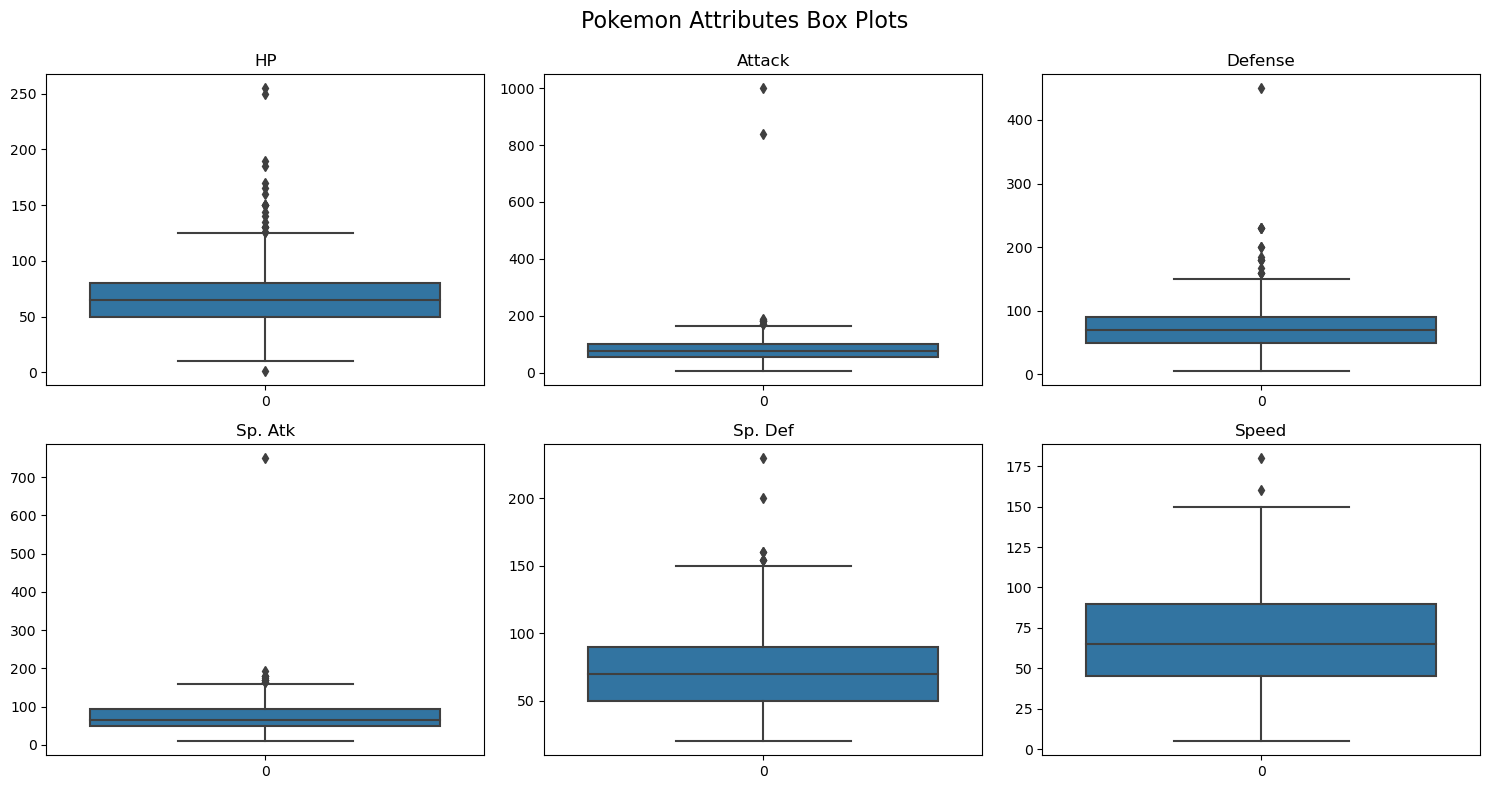

In [88]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.suptitle("Pokemon Attributes Box Plots", fontsize=16)

attributes = [ 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

# 绘制每个属性的箱线图并将它们放在子图中
for i, attribute in enumerate(attributes):
    row, col = divmod(i, 3)
    ax = axes[row, col]
    sns.boxplot(data=df[attribute], orient="v", ax=ax)
    ax.set_title(attribute)
    ax.set_ylabel("")

plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.show()